In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset=pd.read_csv('input/Financial-Data.csv')

## #EDA

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## #Cleaning the data

In [5]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [9]:
dataset2= dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

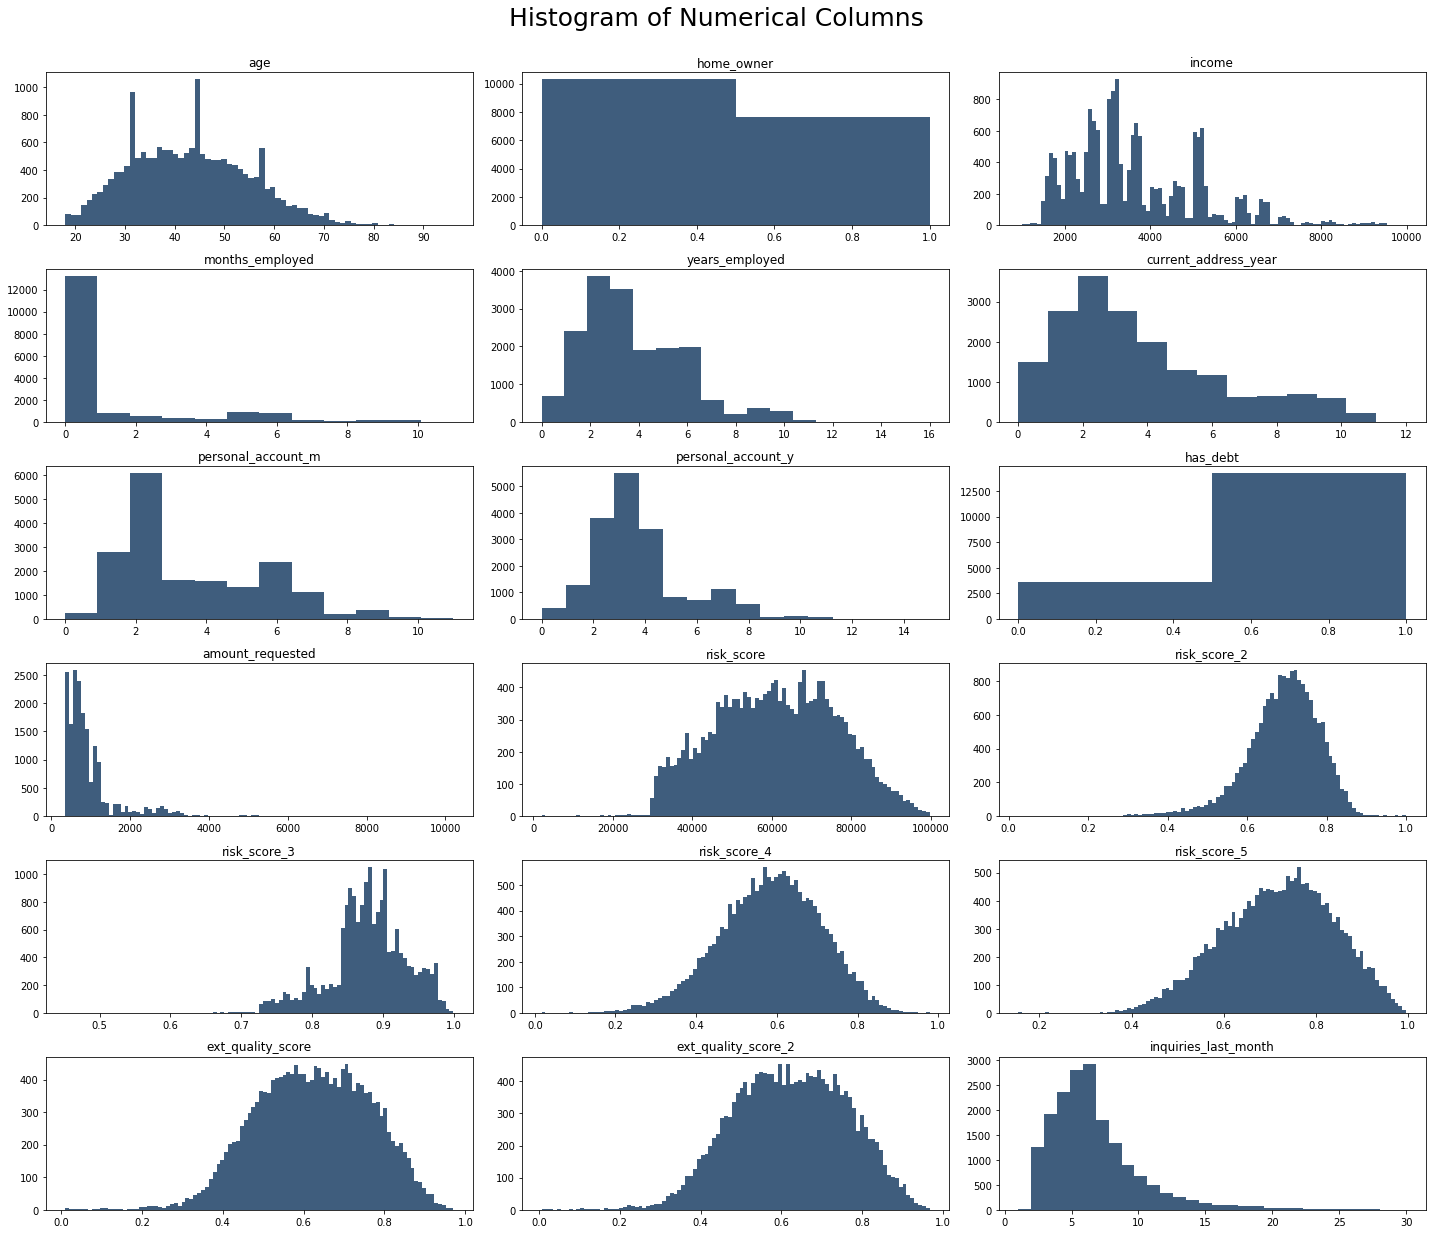

In [25]:
#plotting histogram
plt.figure(figsize=(20,18))
plt.suptitle('Histogram of Numerical Columns', fontsize=25)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals= np.size(dataset2.iloc[:,i].unique())
    if vals>=100:
        vals=100
    plt.hist(dataset2.iloc[:,i], bins = vals, color= '#3f5d7d')
    plt.tight_layout(rect=[0,0.03,1,0.95])

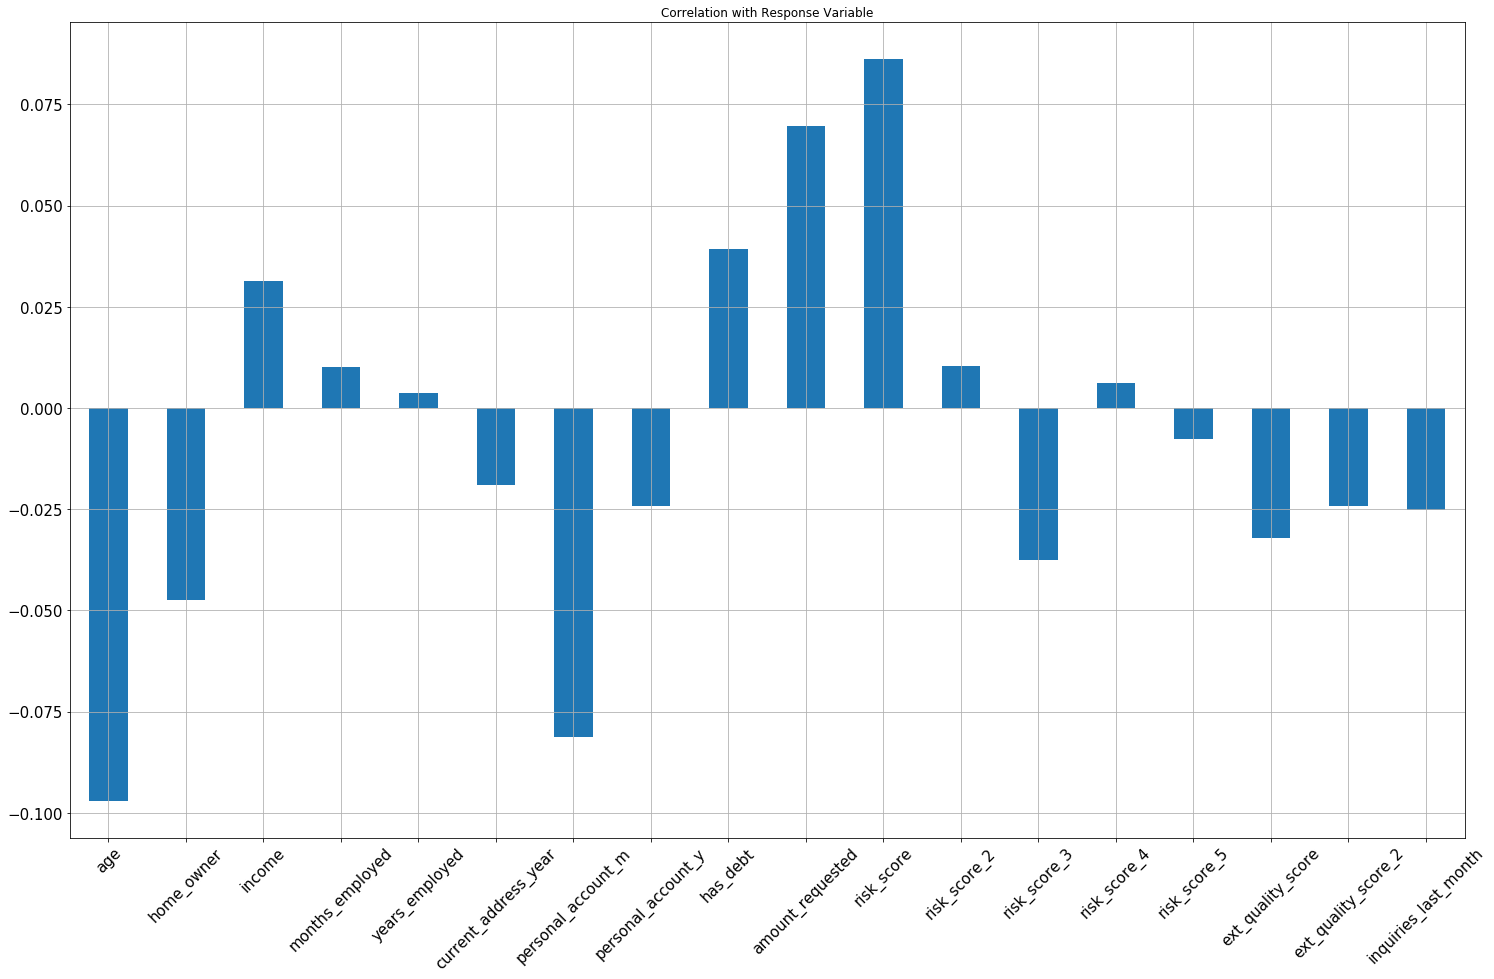

In [29]:
#Correlation with Response
dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(25,15),title='Correlation with Response Variable',
                                             fontsize= 15, rot=45, grid= True)

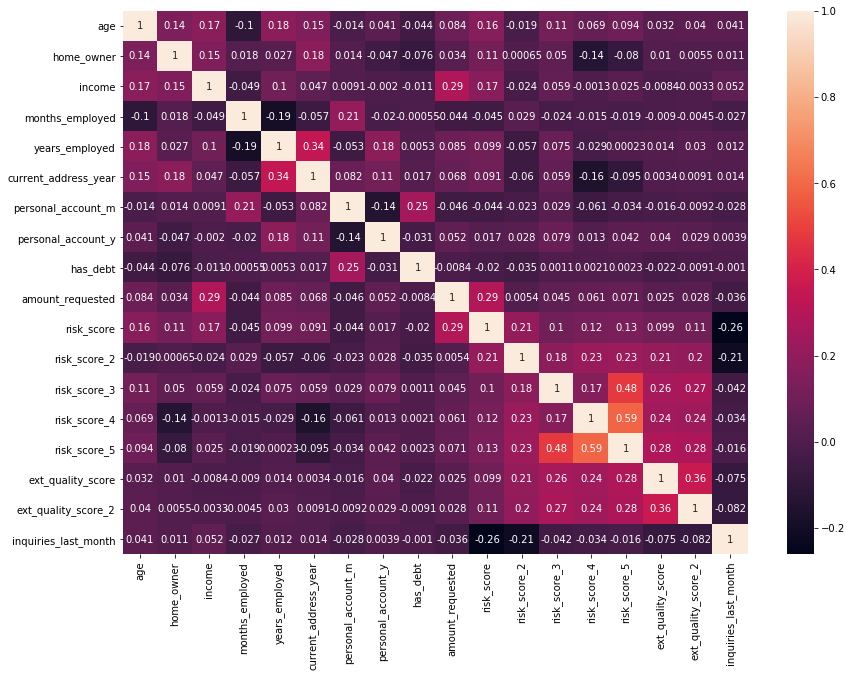

In [32]:
#Correlation Matrix
plt.figure(figsize=(14,10))
corr=dataset2.corr()
sns.heatmap(corr, annot=True)

## #Data Preprocessing

In [33]:
# Feature Engineering
dataset= dataset.drop(columns=['months_employed'])

In [34]:
dataset['personal_account_months']= (dataset.personal_account_m + (dataset.personal_account_y)*12)

In [35]:
dataset= dataset.drop(columns=['personal_account_m','personal_account_y'])

In [36]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [37]:
#One Hot Encoding
dataset= pd.get_dummies(dataset)

In [38]:
dataset.columns


Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [39]:
dataset=dataset.drop(columns=['pay_schedule_semi-monthly'])

In [40]:
#Removing extra columns
response= dataset['e_signed']
users= dataset['entry_id']
dataset=dataset.drop(columns=['e_signed','entry_id'])

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(dataset, response, test_size= 0.2, random_state= 0)

In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train2= pd.DataFrame(data = sc_x.fit_transform(x_train), index= x_train.index.values, columns= x_train.columns.values)
x_test2 =pd.DataFrame(data = sc_x.transform(x_test), index= x_test.index.values, columns= x_test.columns.values)


In [43]:
x_train =x_train2
x_test= x_test2

In [45]:
#Model Building (Logistic Regression)
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
classifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred= classifier.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1654
           1       0.58      0.71      0.63      1928

    accuracy                           0.56      3582
   macro avg       0.56      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



In [51]:
#Model Building (SVM Linear)
from sklearn.svm import SVC
classifier= SVC(random_state=0, kernel='linear')
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
y_pred= classifier.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1654
           1       0.58      0.74      0.65      1928

    accuracy                           0.57      3582
   macro avg       0.56      0.55      0.55      3582
weighted avg       0.56      0.57      0.55      3582



In [54]:
#Model Building (SVM rbf)
from sklearn.svm import SVC
classifier= SVC(random_state=0, kernel='rbf')
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
y_pred= classifier.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1654
           1       0.61      0.69      0.65      1928

    accuracy                           0.59      3582
   macro avg       0.59      0.58      0.58      3582
weighted avg       0.59      0.59      0.59      3582



In [57]:
#Model Building (Random Forest)
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
y_pred= classifier.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1654
           1       0.64      0.68      0.66      1928

    accuracy                           0.62      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.62      0.62      3582



In [63]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
acc= cross_val_score(estimator = classifier, X= x_train, y= y_train, cv=10)


In [66]:
acc.mean()

0.6301850436830183

In [68]:
acc.std()*2

0.0250067849244252

## #Parameter Tuning

### #Applying Grid Search

In [69]:
#Round 1: Entropy
parameters= {"max_depth":[3,None], "max_features":[1,5,10], "min_samples_split": [2,5,10],
            "min_samples_leaf":[1,5,10], "bootstrap":[True, False],
            "criterion": ["entropy"]}

In [75]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator= classifier, param_grid= parameters, scoring='accuracy', cv=3, n_jobs=-1)

In [76]:
import time
t0=time.time()
grid_search= grid_search.fit(x_train, y_train)
t1= time.time()
print("Took %0.2f seconds" % (t1-t0))

Took 516.18 seconds


In [77]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters= grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.6294847857671136,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [78]:
y_pred= grid_search.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      1654
           1       0.64      0.68      0.66      1928

    accuracy                           0.62      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.62      0.62      3582

